In [1]:
import pandas as pd
import numpy as np

### Data Preparation

In [149]:
# df = pd.read_csv("../../Datasets/student/student-mat.csv", sep=[df1, df2])
df1 = pd.read_csv("../../Datasets/student/student-por.csv", sep=';')
df2 = pd.read_csv("../../Datasets/student/student-mat.csv", sep=';')
df = pd.concat([df1, df2])
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


Check for duplicates because there doesn't seem to be an ID

In [150]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [151]:
df.columns = df.columns.str.lower()
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

In [152]:
df.g1.max(), df.g2.max(), df.g3.max()

(19, 19, 20)

In [153]:
cat = df.select_dtypes('object').columns
nume = df.select_dtypes('number').columns
for v in cat:
    df[v] = df[v].str.lower().str.replace(' ', '_')
df.head(1)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,gp,f,18,u,gt3,a,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11


### EDA

In [154]:
df.duplicated().sum()

0

In [155]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
pstatus       False
medu          False
fedu          False
mjob          False
fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
dalc          False
walc          False
health        False
absences      False
g1            False
g2            False
g3            False
dtype: bool

In [156]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
pstatus        2
medu           5
fedu           5
mjob           5
fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
dalc           5
walc           5
health         5
absences      35
g1            18
g2            17
g3            19
dtype: int64

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

target_values = ['g1', 'g2', 'g3']

#### Does school affect the grades?

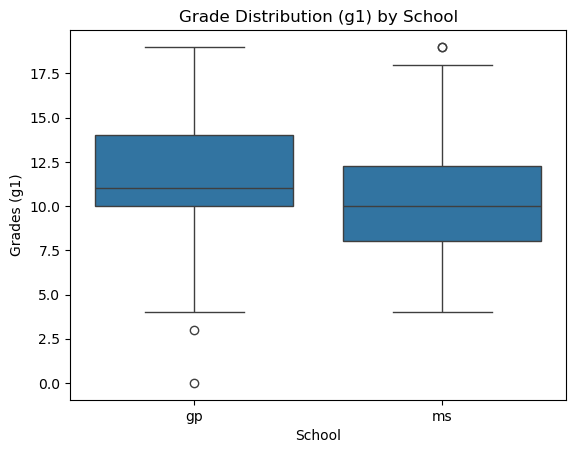

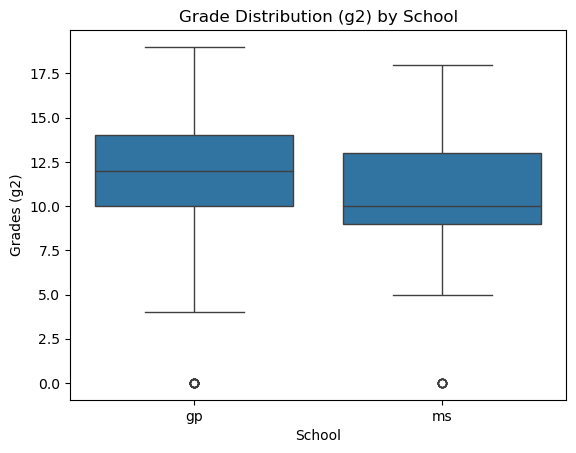

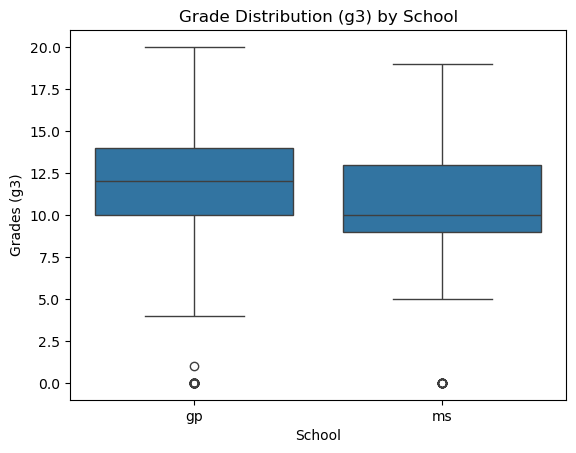

In [158]:
for g in target_values:
    sns.boxplot(y=df[g], x=df.school)
    plt.xlabel("School")
    plt.ylabel(f"Grades ({g})")
    plt.title(f"Grade Distribution ({g}) by School")
    plt.show()

#### Is the address related to the school?

In [159]:
df.address.values, df.school.values

(array(['u', 'u', 'u', ..., 'r', 'r', 'u'], dtype=object),
 array(['gp', 'gp', 'gp', ..., 'ms', 'ms', 'ms'], dtype=object))

#### How does the study time affect grades?

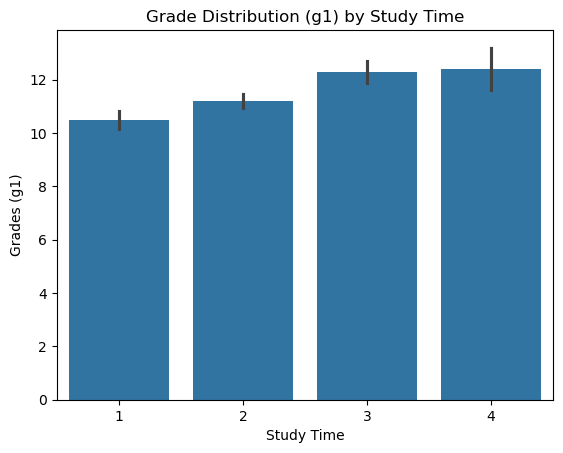

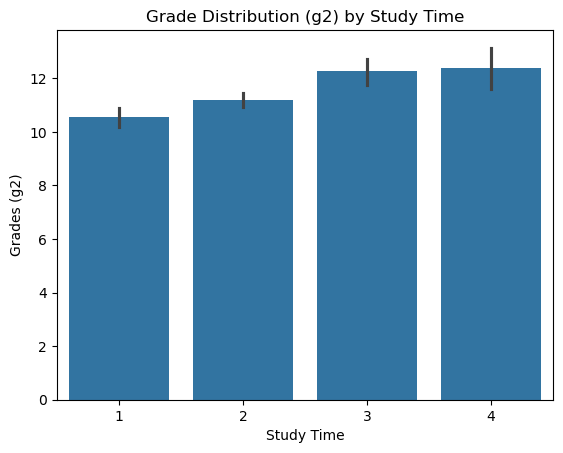

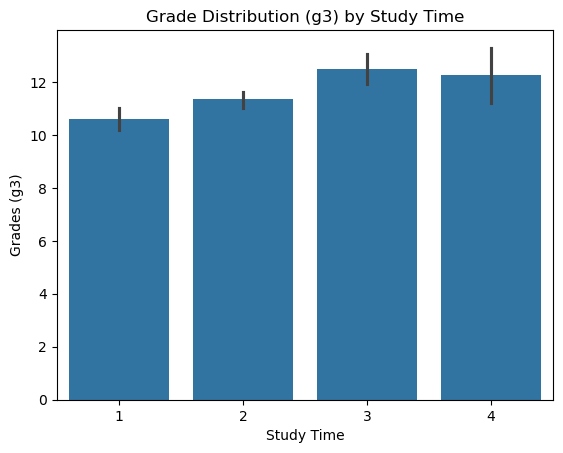

In [160]:
for g in target_values:
    sns.barplot(y=df[g], x=df.studytime)
    plt.xlabel("Study Time")
    plt.ylabel(f"Grades ({g})")
    plt.title(f"Grade Distribution ({g}) by Study Time")
    plt.show()

#### How does having access to internet affect grades?

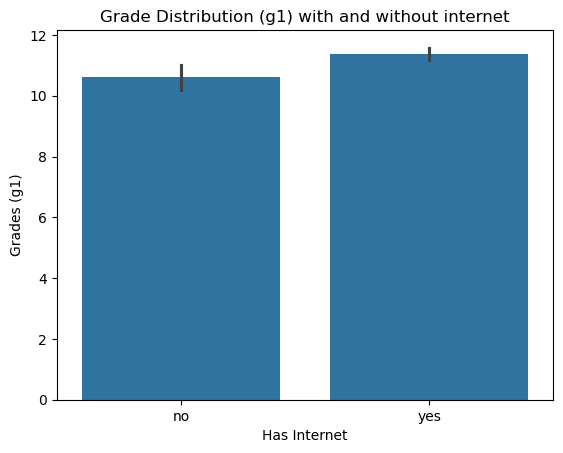

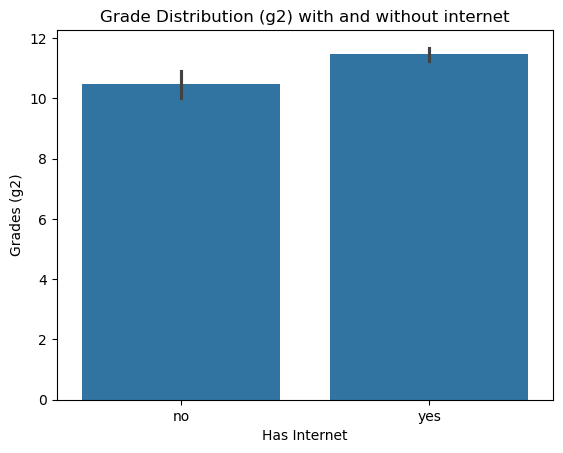

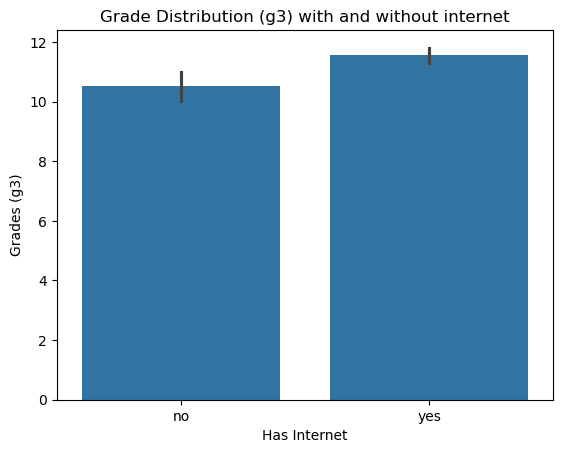

In [161]:
for g in target_values:
    sns.barplot(y=df[g], x=df.internet)
    plt.xlabel("Has Internet")
    plt.ylabel(f"Grades ({g})")
    plt.title(f"Grade Distribution ({g}) with and without internet")
    plt.show()

### Data Splitting

In [162]:
from sklearn.model_selection import train_test_split

# 60 20 20 split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=42)

# make sure splitting was done correctly
assert len(df_test) == len(df_val)
assert (len(df_train) + len(df_val) + len(df_test)) == len(df)

# target variables
y_full_train = df_full_train[target_values].values
y_train = df_train[target_values].values
y_val = df_val[target_values].values
y_test= df_test[target_values].values

# drop target columns
df_full_train.drop(target_values, axis=1, inplace=True)
df_train.drop(target_values, axis=1, inplace=True)
df_val.drop(target_values, axis=1, inplace=True)
df_test.drop(target_values, axis=1, inplace=True)

### One-hot encoding

In [163]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

# convert df to dictionary
full_dict_train = df_full_train.to_dict(orient='records')
dict_train = df_train.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

#extract unique categorical values
#dv.features_names_out() to see new columns extracted
dv.fit(full_dict_train)

# convert categorical values to 1s and 0s via dv(one-hot encoding)
X_full_train = dv.transform(full_dict_train)
X_train = dv.transform(dict_train)
X_val = dv.transform(dict_val)
X_test = dv.transform(dict_test)

### Model

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# train and fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# predict with validation data
y_pred = np.round(lr_model.predict(X_val))
y_pred[0], y_val[0]

(array([12., 13., 14.]), array([12, 12, 13], dtype=int64))

In [165]:
rmse_per_column = [
    root_mean_squared_error(y_val[:, i], y_pred[:, i])
    for i in range(y_pred.shape[1])
]

print("RMSE for each column:", rmse_per_column)

RMSE for each column: [2.533035322016598, 2.6303346340496945, 3.2370463233512012]
